In [75]:
'Test_Task3_Baby presence detection when covered in blanket or sunscreen'

'Test_Task3_Baby presence detection when covered in blanket or sunscreen'

In [77]:
import gc
gc.collect()

4474

In [79]:
%reset -f

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

# Test measurements

In [85]:
import numpy as np
import pandas as pd
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
file_path = 'BabyCovered_with_Blanket_or_Sunscreen_npy_array_Lowpassfiltered_label.npy'

# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_testdata = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
#dataframe_testdata = dataframe_testdata.iloc[:2000]
#dataframe_testdata = dataframe_testdata.sample(n=2000, random_state=42)
dataframe_testdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,46378.617052,0.000000,1.0
1,162.760417,22730.877556,-3.056708,1.0
2,325.520833,1213.847030,2.132477,1.0
3,488.281250,461.454602,2.500521,1.0
4,651.041667,788.183052,0.018248,1.0
...,...,...,...,...
11995,-813.802083,708.186621,1.826979,1.0
11996,-651.041667,788.183052,-0.018248,1.0
11997,-488.281250,461.454602,-2.500521,1.0
11998,-325.520833,1213.847030,-2.132477,1.0


In [86]:
num_rows_test = len(dataframe_testdata)
num_rows_test

12000

In [87]:
fft_magnitudes_test = dataframe_testdata["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_test

array([46378.61705164, 22730.87755585,  1213.84702993, ...,
         461.45460167,  1213.84702993, 22730.87755585], shape=(12000,))

In [91]:
fft_frequencies_test = dataframe_testdata["Frequency"].values  # Convert to NumPy array
fft_frequencies_test

array([   0.        ,  162.76041667,  325.52083333, ..., -488.28125   ,
       -325.52083333, -162.76041667], shape=(12000,))

In [93]:
fft_phase_test = dataframe_testdata["Phase"].values  # Convert to NumPy array
fft_phase_test

array([ 0.        , -3.05670814,  2.13247747, ..., -2.50052126,
       -2.13247747,  3.05670814], shape=(12000,))

In [95]:
import numpy as np
from scipy.stats import entropy
from scipy.signal import find_peaks

def extract_features(fft_freqs, fft_mags, fft_phase):
    # Normalize magnitudes to prevent division errors
    norm_mags = fft_mags / np.sum(fft_mags) if np.sum(fft_mags) > 0 else fft_mags
    
    # Spectral Centroid (Weighted Mean of Frequencies)
    spectral_centroid = np.sum(fft_freqs * norm_mags) / np.sum(norm_mags)

    # Spectral Bandwidth (Spread around centroid)
    spectral_bandwidth = np.sqrt(np.sum(norm_mags * (fft_freqs - spectral_centroid) ** 2))

    # Spectral Flatness (Geometric Mean / Arithmetic Mean)
    spectral_flatness = np.exp(np.mean(np.log(fft_mags + 1e-10))) / np.mean(fft_mags + 1e-10)

    # Find peaks in the magnitude spectrum
    peaks, _ = find_peaks(fft_mags, height=0.1 * np.max(fft_mags))  # Adaptive threshold

    # Harmonic Ratio (Ratio of 2nd peak to 1st peak)
    if len(peaks) >= 2:
        harmonic_ratio = fft_mags[peaks[1]] / fft_mags[peaks[0]]
    else:
        harmonic_ratio = 0  # No second peak detected

    # Phase Features
    phase_variance = np.var(fft_phase)  # Variance of phase angles
    phase_mean = np.mean(fft_phase)  # Mean of phase angles
    phase_diff = np.mean(np.diff(fft_phase))  # Average phase difference between frequencies

    return {
        "mean_fft": np.mean(fft_mags),
        "std_fft": np.std(fft_mags),
        "max_fft": np.max(fft_mags),
        "min_fft": np.min(fft_mags),
        "median_fft": np.median(fft_mags),
        "sum_fft": np.sum(fft_mags),
        "spectral_entropy": entropy(norm_mags),  # Energy spread
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_flatness": spectral_flatness,
        "phase_variance": phase_variance,
        "phase_mean": phase_mean,
        "phase_diff": phase_diff,
    }

In [97]:
# Function to apply perturbation based on reference values
def add_perturbation(reference_features, num_rows, perturb_range=0.03):
    perturbed_data = []
    
    for _ in range(num_rows):
        perturbed_features = {
            key: value * (1 + np.random.uniform(-perturb_range, perturb_range)) 
            for key, value in reference_features.items()
        }
        perturbed_data.append(perturbed_features)
    
    return pd.DataFrame(perturbed_data)

In [99]:
# Extract features for fft_test
reference_features_test = extract_features(fft_frequencies_test, fft_magnitudes_test, fft_phase_test)
reference_features_test

{'mean_fft': np.float64(635.0590910510708),
 'std_fft': np.float64(621.2490828974964),
 'max_fft': np.float64(46378.61705163702),
 'min_fft': np.float64(7.1424536795927756),
 'median_fft': np.float64(566.5549229740988),
 'sum_fft': np.float64(7620709.0926128505),
 'spectral_entropy': np.float64(9.199492044906144),
 'spectral_centroid': np.float64(-43.73615206682007),
 'spectral_bandwidth': np.float64(576112.7574743595),
 'spectral_flatness': np.float64(0.8211543590882378),
 'phase_variance': np.float64(3.2664902165455714),
 'phase_mean': np.float64(3.434289889507151e-17),
 'phase_diff': np.float64(0.00025474690760510937)}

In [103]:
# Generate a DataFrame with perturbed values for all rows in fft_test
num_rows_test = len(dataframe_testdata)
perturbed_test_df = add_perturbation(reference_features_test, num_rows_test, perturb_range=0.03)
perturbed_test_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,638.085375,623.686950,45829.466652,7.080351,575.511007,7.778529e+06,9.320360,-44.406808,573601.480411,0.820799,3.339728,3.502633e-17,0.000260
1,623.304535,633.562245,46204.809414,7.165441,581.160603,7.464081e+06,9.449409,-43.290247,589806.965281,0.830919,3.170796,3.483072e-17,0.000255
2,643.646322,604.400314,46635.802613,7.187572,554.418460,7.846304e+06,9.330408,-42.748732,561025.279227,0.801714,3.357195,3.440917e-17,0.000255
3,637.695850,638.570592,45127.081597,7.099222,576.031322,7.607892e+06,9.188116,-42.615602,564535.087721,0.800834,3.257316,3.522466e-17,0.000257
4,645.223668,628.969622,46498.840401,6.964653,563.777088,7.399869e+06,9.385898,-43.788161,559401.200147,0.845444,3.351867,3.531392e-17,0.000262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,652.351946,639.057917,46143.675904,6.983436,576.694420,7.531969e+06,9.074767,-43.024526,567948.424572,0.834670,3.200443,3.494215e-17,0.000251
11996,630.748324,623.590678,47175.317016,7.099841,553.053500,7.722796e+06,8.941079,-44.090790,573788.002123,0.822794,3.355415,3.420899e-17,0.000251
11997,623.520068,606.448928,47668.491667,7.041047,560.977467,7.778059e+06,9.420688,-43.491673,587386.778579,0.821760,3.268772,3.514223e-17,0.000261
11998,624.010666,624.759080,47505.437345,7.208213,569.688319,7.594993e+06,9.235623,-44.564196,561856.927554,0.838647,3.207652,3.380432e-17,0.000258


In [105]:
dataframe_testdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,46378.617052,0.000000,1.0
1,162.760417,22730.877556,-3.056708,1.0
2,325.520833,1213.847030,2.132477,1.0
3,488.281250,461.454602,2.500521,1.0
4,651.041667,788.183052,0.018248,1.0
...,...,...,...,...
11995,-813.802083,708.186621,1.826979,1.0
11996,-651.041667,788.183052,-0.018248,1.0
11997,-488.281250,461.454602,-2.500521,1.0
11998,-325.520833,1213.847030,-2.132477,1.0


In [106]:
len(perturbed_test_df),len(dataframe_testdata)

(12000, 12000)

In [110]:
# Ensure both DataFrames have the same number of rows
if len(dataframe_testdata) != len(perturbed_test_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_testdata_withfeatures = pd.concat([dataframe_testdata, perturbed_test_df], axis=1)

# Display the first few rows of the updated dataframe_testdata to verify
dataframe_testdata_withfeatures.head()

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,46378.617052,0.000000,1.0,638.085375,623.686950,45829.466652,7.080351,575.511007,7.778529e+06,9.320360,-44.406808,573601.480411,0.820799,3.339728,3.502633e-17,0.000260
1,162.760417,22730.877556,-3.056708,1.0,623.304535,633.562245,46204.809414,7.165441,581.160603,7.464081e+06,9.449409,-43.290247,589806.965281,0.830919,3.170796,3.483072e-17,0.000255
2,325.520833,1213.847030,2.132477,1.0,643.646322,604.400314,46635.802613,7.187572,554.418460,7.846304e+06,9.330408,-42.748732,561025.279227,0.801714,3.357195,3.440917e-17,0.000255
3,488.281250,461.454602,2.500521,1.0,637.695850,638.570592,45127.081597,7.099222,576.031322,7.607892e+06,9.188116,-42.615602,564535.087721,0.800834,3.257316,3.522466e-17,0.000257
4,651.041667,788.183052,0.018248,1.0,645.223668,628.969622,46498.840401,6.964653,563.777088,7.399869e+06,9.385898,-43.788161,559401.200147,0.845444,3.351867,3.531392e-17,0.000262


In [112]:
len(dataframe_testdata)

12000

# Testing the Random Forest Model

In [115]:
#dropping features

In [117]:
to_drop = {'median_fft', 'phase_mean', 'spectral_bandwidth', 'min_fft', 'max_fft', 'sum_fft', 'spectral_centroid', 'spectral_entropy', 'mean_fft', 'std_fft', 'phase_diff'}
test_X = dataframe_testdata_withfeatures.drop(columns=['Infant_Presence'])  # Features
test_y = dataframe_testdata_withfeatures['Infant_Presence']  # Labels
test_x_dataset_1_reduced = test_X.drop(columns=to_drop)

In [119]:
test_x_dataset_1_reduced

,Frequency,FFT Magnitude,Phase,spectral_flatness,phase_variance
0,0.000000,46378.617052,0.000000,0.820799,3.339728
1,162.760417,22730.877556,-3.056708,0.830919,3.170796
2,325.520833,1213.847030,2.132477,0.801714,3.357195
3,488.281250,461.454602,2.500521,0.800834,3.257316
4,651.041667,788.183052,0.018248,0.845444,3.351867
...,...,...,...,...,...
11995,-813.802083,708.186621,1.826979,0.834670,3.200443
11996,-651.041667,788.183052,-0.018248,0.822794,3.355415
11997,-488.281250,461.454602,-2.500521,0.821760,3.268772
11998,-325.520833,1213.847030,-2.132477,0.838647,3.207652


In [121]:
test_y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11995    1.0
11996    1.0
11997    1.0
11998    1.0
11999    1.0
Name: Infant_Presence, Length: 12000, dtype: float64

In [123]:
import joblib

# Load the trained Random Forest model
clf = joblib.load('random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl')

# Example: Transform new data and make predictions
y_pred = clf.predict(test_x_dataset_1_reduced)
y_pred

array([1., 1., 0., ..., 1., 1., 0.], shape=(12000,))

In [125]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed report
print("\nClassification Report:")
print(classification_report(test_y, y_pred))

# Optional: Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, y_pred))


Accuracy: 0.8739

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.87      0.93     12000

    accuracy                           0.87     12000
   macro avg       0.50      0.44      0.47     12000
weighted avg       1.00      0.87      0.93     12000


Confusion Matrix:
[[    0     0]
 [ 1513 10487]]


C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


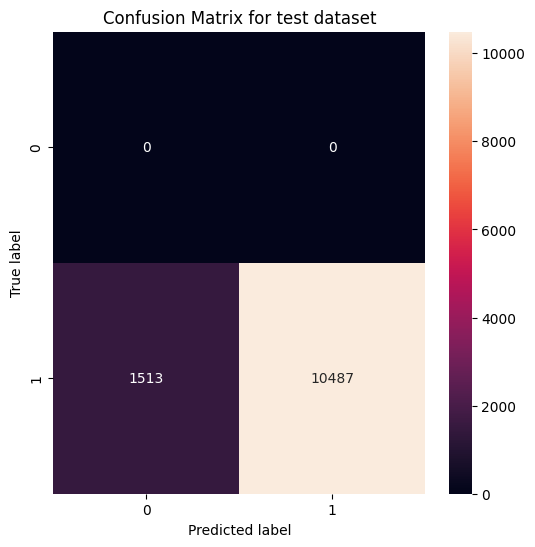

In [127]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix for test dataset')
plt.show()

# Testing with XG Boost model task 3

In [133]:
import xgboost as xgb
import joblib

# Load the trained XGBoost model
clf = xgb.XGBClassifier()
clf.load_model('xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json')

# Load the scaler
scaler = joblib.load('xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl')

# Example: Transform new data and make predictions
X_new_scaled = scaler.transform(test_x_dataset_1_reduced)
y_pred = clf.predict(X_new_scaled)
y_pred

array([1, 1, 0, ..., 1, 1, 0], shape=(12000,))

In [134]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed report
print("\nClassification Report:")
print(classification_report(test_y, y_pred))

# Optional: Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, y_pred))


Accuracy: 0.8577

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.86      0.92     12000

    accuracy                           0.86     12000
   macro avg       0.50      0.43      0.46     12000
weighted avg       1.00      0.86      0.92     12000


Confusion Matrix:
[[    0     0]
 [ 1708 10292]]


C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


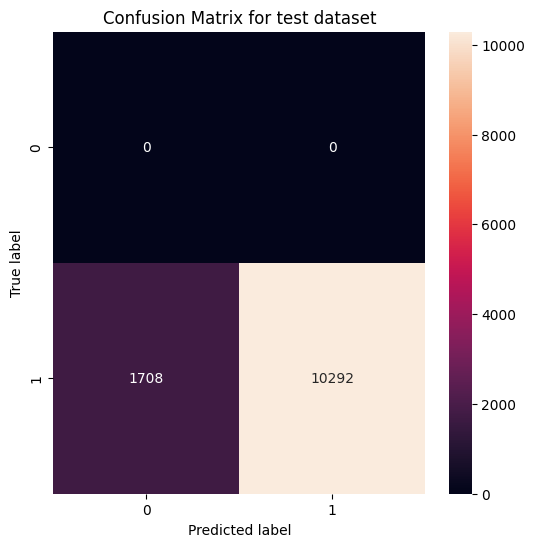

In [137]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix for test dataset')
plt.show()